# (실습) 통계 기초

**참고**

[통계 기초](https://codingalzi.github.io/datapy/from_scratch_2.html)에
정의된 다음 함수들을 활용할 수 있다.

- mean
- median
- quantile
- mode
- data_range
- iqr
- var
- std
- cov
- corrcoef

**필수 모듈**

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [31]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

In [32]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    try:
        font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트를 사용
        font = mpl.font_manager.FontProperties(fname=font_path).get_name()
        plt.rc('font', family=font)
    except FileNotFoundError:
        print("폰트 파일을 찾을 수 없습니다. 다른 경로를 확인하세요.")
# 우분투/구글 코랩 설정
elif platform.system() == 'Linux':
    # 우분투/구글코랩의 경우 아래 명령문이 최소 한번 실행되어야 함
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv

    font = "NanumBarunGothic"
    if not any(map(lambda ft: ft.name == font, mpl.font_manager.fontManager.ttflist)):
        mpl.font_manager.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=font)
    plt.rc("axes", unicode_minus=False)

## 데이터 준비

영산강에 설치된 승천보에서 측정한 두 개의 데이터셋이다.

- `chl_a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `flow`: 보에서 방출되는 시간당 방류량 수치 100개

두 데이터셋의 인덱스는 수질(water quality)을 가리키며,
높은 숫자일 수록 수질은 나쁘다.

In [33]:
# 클로로필-A 수치 100개

chl_a = [51, 51, 53, 53, 54, 55, 57, 57, 59, 60,
         61, 62, 63, 64, 65, 66, 67, 67, 67, 69,
         70, 71, 71, 72, 73, 75, 75, 76, 77, 79,
         81, 81, 83, 83, 85, 86, 87, 88, 88, 88,
         89, 89, 90, 91, 92, 95, 96, 96, 97, 98,
         98, 98, 99, 101, 101, 102, 102, 103, 104, 104,
         104, 104, 105, 106, 107, 108, 110, 111, 111, 112,
         112, 112, 113, 114, 114, 116, 116, 116, 117, 118,
         118, 118, 118, 119, 120, 120, 121, 122, 125, 120,
         121, 121, 121, 122, 122, 122, 122, 124, 125, 124]

In [34]:
# 시간당 방류량 수치 100개

flow = [25, 25, 24, 24, 22, 22, 21, 21, 20, 20,
        19, 19, 19, 18, 18, 18, 17, 17, 17, 16,
        16, 16, 17, 16, 17, 17, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 15, 15, 15, 15, 15,
        15, 14, 15, 14, 14, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 12, 12, 12, 12,
        12, 12, 52, 11, 11, 11, 11, 11, 12, 12,
        12, 12, 12, 11, 12, 12, 12, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 10,
        9, 9, 9, 9, 9, 9, 9, 49, 9, 9]

**문제**

각각의 데이터셋 크기가 100임을 확인하라.

힌트: `len()` 함수

In [35]:
print(len(chl_a), len(flow))

100 100


**문제**

가장 높은 클로로필-A의 수치는 얼마인가?

In [36]:
chl_a_max = max(chl_a)

**문제**

가장 낮은 시간당 방류량 수치는 얼마인가?

In [37]:
chl_a_min = min(flow)

## 데이터 살펴보기

**문제**

클로로필-A 데이터에 포함된 값들의 빈도를 막대그래프로 그려라.

힌트: `from collections import Counter`

Counter({122: 5, 104: 4, 118: 4, 121: 4, 67: 3, 88: 3, 98: 3, 112: 3, 116: 3, 120: 3, 51: 2, 53: 2, 57: 2, 71: 2, 75: 2, 81: 2, 83: 2, 89: 2, 96: 2, 101: 2, 102: 2, 111: 2, 114: 2, 125: 2, 124: 2, 54: 1, 55: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 69: 1, 70: 1, 72: 1, 73: 1, 76: 1, 77: 1, 79: 1, 85: 1, 86: 1, 87: 1, 90: 1, 91: 1, 92: 1, 95: 1, 97: 1, 99: 1, 103: 1, 105: 1, 106: 1, 107: 1, 108: 1, 110: 1, 113: 1, 117: 1, 119: 1})


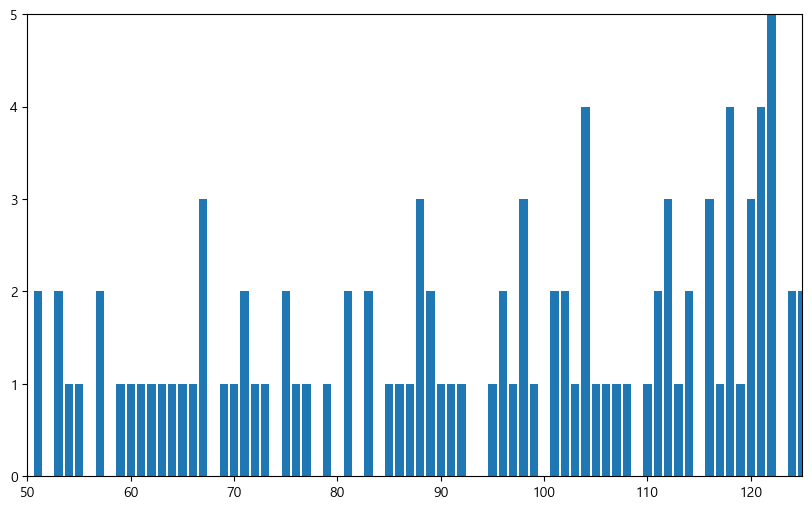

In [93]:
from collections import Counter
chl_a_data = Counter(chl_a)
print(chl_a_data)
xs = range(126)
ys = [chl_a_data[x] for x in xs]
plt.bar(xs,ys)
plt.axis([50, 125, 0, 5]) 
plt.show()

## 중심 경향성과 평균

**문제**

방류량의 평균값을 계산하라.

In [102]:
import numpy as np
flow_mean = np.mean(flow)
flow_mean

14.93

**문제**

방류량의 중앙값을 계산하라.

In [103]:
flow_median = np.median(flow)

**문제**

방류량의 최빈값을 계산하라.

In [104]:
def mode(xs):
    """
    최빈값
    """
    # Counter 객체 생성
    counts = Counter(xs)
    # 키값의 최댓값 확인
    max_count = max(counts.values())
    # 최대 키값을 갖는 키들의 집합
    modes = {x_i for x_i, count in counts.items() if count == max_count}
    return modes
mode(flow)

{11}

**문제**

방류량의 제1, 제3 사분위수를 계산하라.

In [105]:
print(np.quantile(flow,0.25),np.quantile(flow,0.75))

11.0 16.0


## 산포도와 분산

**문제**

클로로필-A 데이터의 범위를 계산하라.

In [49]:
chl_a_range = chl_a_max-chl_a_min
chl_a_range

116

**문제**

클로로필-A 데이터의 분산을 계산하라.

In [108]:
def dotV(v, w):
    assert len(v) == len(w), "벡터들의 길이가 동일해야 함"""

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def dev_mean(xs):
    """평균값과의 차이 계산"""
    mu = np.mean(xs)
    return [x - mu for x in xs]

def sum_of_squares(v):
    """반환값: v_1 * v_1 + ... + v_n * v_n"""
    return dotV(v, v)
def var(xs):
    """
    분산값 계산. 단, 2개 이상의 데이터가 있어야 함.
    """
    
    assert len(xs) >= 2, "두 개 이상의 데이터 필요"

    n = len(xs)
    deviations = dev_mean(xs)
    deviation_sum = sum_of_squares(deviations)
    return deviation_sum / (n - 1)
var(chl_a)

511.9195959595961

In [109]:
chl_a_var = sum((chl_a - np.mean(chl_a))**2) / (len(chl_a)-1)
chl_a_var
#np.var(chl_a)

511.9195959595961

**문제**

클로로필-A 데이터의 표준편차를 계산하라.

In [110]:
chl_a_std = np.std(chl_a)
chl_a_std

22.51222778847087

## 선형 상관관계

**문제**

클로로필-A와 시간당 방류량 사이의 공분산을 계산하고
두 데이터 사이의 상관관계를 설명하라.

In [112]:
def cov(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)
cov(chl_a, flow)

-66.88868686868692

94.80808080808076

**문제**

클로로필-A와 시간당 방류량 사이의 피어슨 상관계수를 계산하고
두 데이터 사이의 선형 상관관계를 설명하라.

In [113]:
def corrcoef(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    stdev_x = np.std(xs) # xs의 표준편차
    stdev_y = np.std(ys) # ys의 표준편차

    if stdev_x > 0 and stdev_y > 0:
        return cov(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0    # 표준편차가 0인 데이터셋과의 선형 상관관계는 없음.

corrcoef(chl_a, flow)

-0.46812514830997753

## 이상치

**산점도**

x축을 방류량, y축을 클로로필-A 수치로 지정한 다음 산점도를 그려보자.

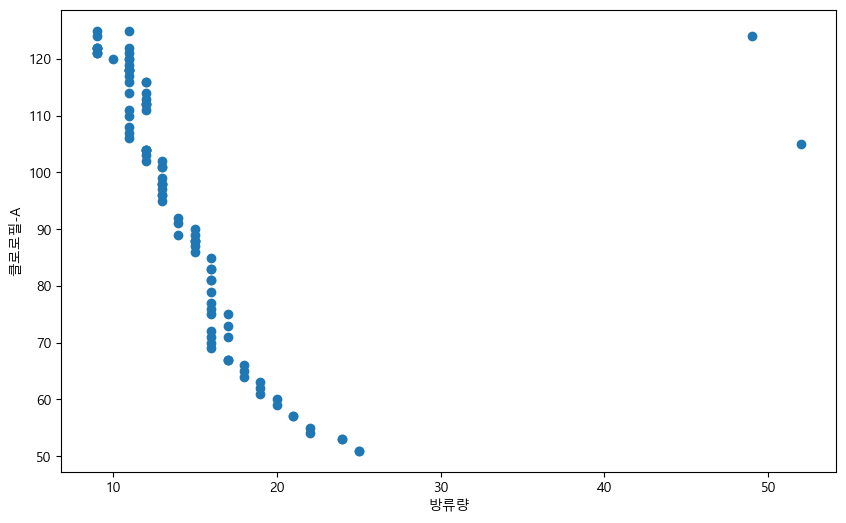

In [73]:
plt.scatter(flow, chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

위 산점도에 따르면 두 개의 이상치가 존재한다.
어떤 데이터가 이상치인지 설명하라.

방류량이 증가할 수록 클로로필-A 수치가 떨어지는 게 일반적이다. 하지만 방류량이 40이상임에도 불구하고 클로로필-A 수치가 높은 두 개의 데이터는 일반적인 경향과 많이 어긋난다. 따라서 이 두 데이터를 이상치로 간주할 수 있다.

**문제**

클로로필-A 데이터와 방수량 두 데이터셋 모두에서
이상치에 해당하는 두 개의 값을 제거한다.

In [115]:
over40_index = []

for i in range(100):
    if flow[i] >= 40:
        over40_index.append(i)
        
over40_index


[62, 97]

In [117]:
# None을 적절한 표현식으로 대체할 것.
new_chl_a = []

for i in range(100):
    if i in over40_index:
        continue
    
    new_chl_a.append(chl_a[i])

In [118]:
# None을 적절한 표현식으로 대체할 것.
new_flow = []

for i in range(100):
    if i in over40_index:
        continue
    
    new_flow.append(flow[i])


이상치를 제거한 두 데이터셋을 이용하여 산점도를 다시 그려라.

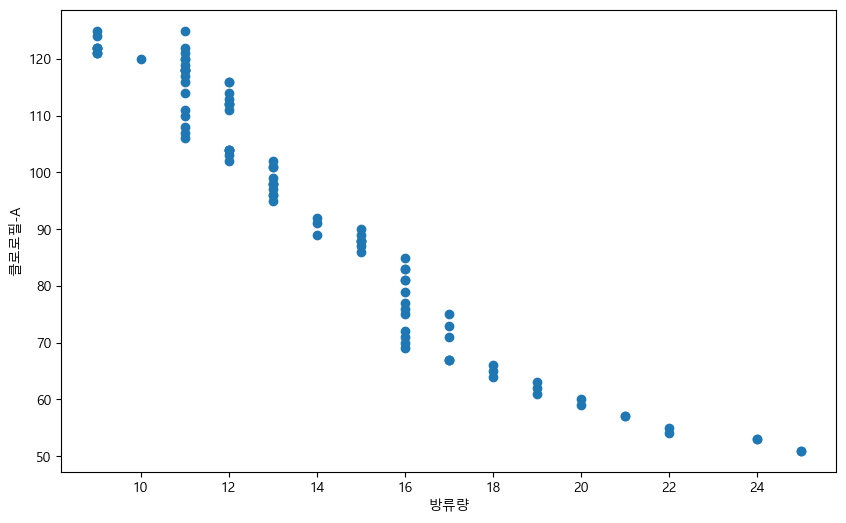

In [119]:
plt.scatter(new_flow, new_chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

이상치를 제거하기 이전과 이후의 데이터셋을 이용하여 아래 값들이 어떻게 달라졌는지 설명하라.

- 평균값, 중앙값, 최빈값
- 범위, 사분범위, 분산, 표준편차
- 공분산, 피어슨 상관계수

평균: 평균은 조금씩 줄어들었다. 이유는 상대적으로 큰 두 이상치가 제거되었기 때문이다. 하지만 데이터 수가 많아서 평균값은 크게 줄지는 않는다
중위수: 중위수는 거의 변화 없다. 즉, 중위수는 이상치에 둔감하다.
최빈값: 최빈값 또한 변화 없다. 이상치의 빈도가 일반적으로 높지 않아서 최빈값에 영향을 주지 않는다.
범위: 이상치를 제거하면 방류량의 범위가 크게 줄어든다.
사분범위: 사분범위는 변화가 없다. 즉, 사분범위는 이상치에 둔감하다.
표준편차, 분산: 방류량의 분산과 표준편차가 크게 줄어들었다. 즉, 이상치의 영향이 없어져서 데이터의 분산 정도가 크게 줄어들었다.
공분산, 상관계수: 이상치를 제거하니 공분산과 상관계수의 절대값이 커졌다. 즉, 두 데이터의 음의 상관관계가 더 명확해졌다.